# EfficientNet Hyper-Parameter Tuning

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import KFold

import cv2
import random
from PIL import Image
import os

import keras_tuner
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import EfficientNetB5
from tensorflow.keras import optimizers
from tensorflow import keras

import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
print(tf.__version__)

/mnt/local/yuxin/anaconda3/envs/gender/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-11-10 19:32:20.158528: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1


In [2]:
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

2022-11-10 19:32:38.313330: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-10 19:32:38.485012: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-10 19:32:38.530699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:38.532292: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-11-10 19:32:38.532530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node ze

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

ary libcusolver.so.10
2022-11-10 19:32:38.574745: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusparse.so.10
2022-11-10 19:32:38.586281: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-11-10 19:32:38.586588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:38.587901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:38.589099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:38.590221: I 

In [3]:
device_lib.list_local_devices()

2022-11-10 19:32:39.240666: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 19:32:39.242081: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-10 19:32:39.364566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:39.364909: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18096227701064749285,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9743324928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8542869358556136087
 physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 10107403648
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8863128457851695338
 physical_device_desc: "device: 1, name: GeForce RTX 2080 Ti, pci bus id: 0000:02:00.0, compute capability: 7.5"]

m SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:39.893269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:39.893562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:39.893850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:32:39.894119: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/device:GPU:0 with 9291 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute c

# Preprocess Adience Dataset

In [4]:
# load data
ADIENCE_PATH = './Adience'
print(os.listdir(path=ADIENCE_PATH))

all_folds={}
for i in range(5):
    all_folds[i]=pd.read_csv(os.path.join(ADIENCE_PATH, f'fold_{i}_data.txt'),sep = "\t" )

['AdienceBenchmarkGenderAndAgeClassification', 'faces', 'fold_0_data.txt', 'fold_1_data.txt', 'fold_2_data.txt', 'fold_3_data.txt', 'fold_4_data.txt', '__MACOSX']


In [5]:
total_data = pd.concat([all_folds[i] for i in range(5)],ignore_index=True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [6]:
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


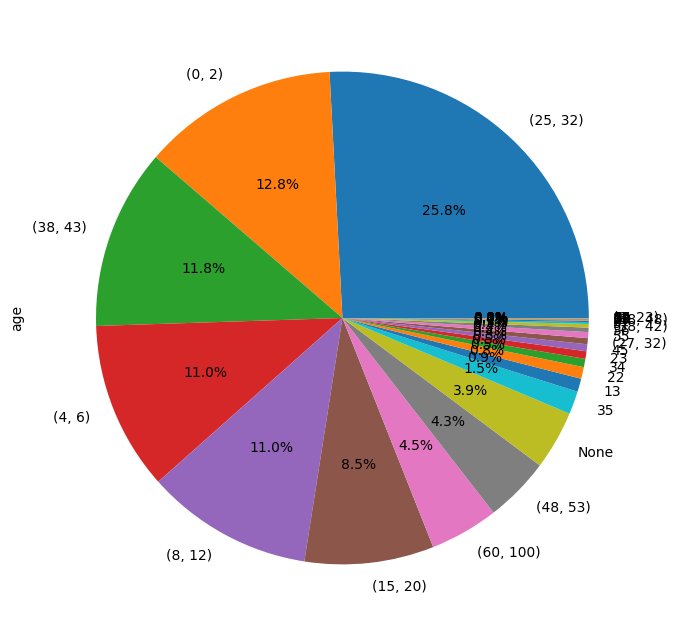

In [7]:
# pie_graph
plt.figure(1, figsize=(8,8))
total_data.age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

f    9372
m    8120
u    1099
Name: gender, dtype: int64


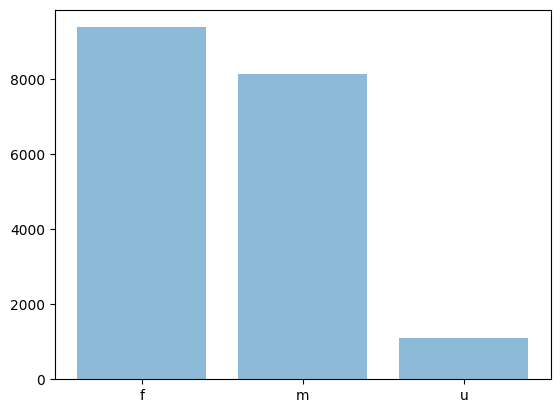

In [8]:
# bar chart
gender = ['f','m','u']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5)
print(total_data.gender.value_counts())
plt.show()

In [9]:
df = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()

img_path = []

for row in total_data.iterrows():
    path = f"{ADIENCE_PATH}/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)
df['img_path'] = img_path

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       19370 non-null  object
 1   gender    18591 non-null  object
 2   x         19370 non-null  int64 
 3   y         19370 non-null  int64 
 4   dx        19370 non-null  int64 
 5   dy        19370 non-null  int64 
 6   img_path  19370 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.0+ MB


In [10]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(df.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        df.age.loc[idx] = age_mapping_dict[each]

df = df.drop(labels=drop_labels, axis=0) #droped None values
df.age.value_counts(dropna=False)

/tmp/ipykernel_29656/3604610946.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age.loc[idx] = age_mapping_dict[each]


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [11]:
df = df.dropna()
unbiased_data = df[df.gender != 'u'].copy()
unbiased_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [12]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

# label_to_age_map = {value: key for key, value in age_to_label_map.items()}
# label_to_gender_map = {value: key for key, value in gender_to_label_map.items()}

unbiased_data['age'] = unbiased_data['age'].apply(lambda age: age_to_label_map[age])
unbiased_data['gender'] = unbiased_data['gender'].apply(lambda g: gender_to_label_map[g])

unbiased_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,./Adience/faces/30601258@N03/coarse_tilt_align...
1,4,1,301,105,640,641,./Adience/faces/30601258@N03/coarse_tilt_align...
2,4,0,2395,876,771,771,./Adience/faces/30601258@N03/coarse_tilt_align...
3,4,1,752,1255,484,485,./Adience/faces/30601258@N03/coarse_tilt_align...
4,4,1,175,80,769,768,./Adience/faces/30601258@N03/coarse_tilt_align...


# Create Dataset

In [13]:
X = unbiased_data[['img_path']]
y = unbiased_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


In [14]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


# Create Model
---
## Hyperparameters

In [17]:
batch_size = 32
epochs = 20
target_size = (227, 227) # (64, 64)
input_shape = (227, 227, 3) #(64, 64, 3)

# random seed
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

adam = 0.001
fre = -20
FC = 2048
E = 1
patience = 5
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch = 256
validation_steps = 256

In [18]:
def build_model(hp):
    # init your model here before complilation
    model = EfficientNetB5(weights='imagenet',
                            include_top=False,
                            input_shape=input_shape)
    # Freeze the pre-trained weights initially to train the added layers first
    model.trainable = False 

    # Adding custom Layers
    x = model.output
    x = GlobalAveragePooling2D()(x)
    
    x = keras.layers.Dense(
      hp.Int('hidden_size_1', 512, 1024, step=512),
      activation="relu")(x)
    
    x = Dropout(
        hp.Float('dropout', 0.00, 0.75, step=0.25))(x)
    
    x = keras.layers.Dense(
      hp.Int('hidden_size_2', 256, 512, step=256),
      activation="relu")(x)
    
    predictions = keras.layers.Dense(1, activation='sigmoid')(x)
    
    our_model = tf.keras.Model(inputs=model.input, outputs=predictions)
    
    opt = tf.keras.optimizers.Adam(
        hp.Float('learning_rate', 1e-4, 2e-1, sampling='log'))
    
    our_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return our_model

In [19]:
def get_call_backs():
    lrd = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = patience,
                            verbose = verbose ,
                            factor = factor,
                            min_lr = min_lr)

    mcp = ModelCheckpoint('model.h5')

    es = EarlyStopping(verbose=verbose, patience=patience)
    
    return [lrd, mcp, es]

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


2022-11-10 19:41:15.463175: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-10 19:41:15.463367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:41:15.463887: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-11-10 19:41:15.463979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:41:15.464465: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:02:00

INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [20]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

tuner.search(train_images, y_train, epochs=50, validation_data=(test_images, y_test),
             callbacks=get_call_backs(), verbose=1)

best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

Trial 10 Complete [00h 06m 06s]
val_accuracy: 0.8252483010292053

Best val_accuracy So Far: 0.9182581901550293
Total elapsed time: 01h 48m 32s
INFO:tensorflow:Oracle triggered exit


In [24]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
hidden_size_1: 512
dropout: 0.5
hidden_size_2: 512
learning_rate: 0.00012206725750339634
Score: 0.9182581901550293
Trial summary
Hyperparameters:
hidden_size_1: 512
dropout: 0.75
hidden_size_2: 512
learning_rate: 0.0009496034619675067
Score: 0.9132925868034363
Trial summary
Hyperparameters:
hidden_size_1: 512
dropout: 0.25
hidden_size_2: 256
learning_rate: 0.00022721671927273106
Score: 0.9132925868034363
Trial summary
Hyperparameters:
hidden_size_1: 1024
dropout: 0.5
hidden_size_2: 512
learning_rate: 0.00018798156103983554
Score: 0.911955714225769
Trial summary
Hyperparameters:
hidden_size_1: 512
dropout: 0.25
hidden_size_2: 512
learning_rate: 0.00874517778137032
Score: 0.9073720574378967
Trial summary
Hyperparameters:
hidden_size_1: 1024
dropout: 0.0
hidden_size_2: 512
learning_rate: 0.028207277214472967
Score: 0.8770053386688232
Trial summary
Hyperparameters:
hidden_size_1: 512
dropout

In [21]:
# the best set of hyperparameters
best_hyperparameters.values

{'hidden_size_1': 512,
 'dropout': 0.5,
 'hidden_size_2': 512,
 'learning_rate': 0.00012206725750339634}

# Using the best model configuration, train a model

In [26]:
def build_model(best_hp):
    hs1 = best_hp['hidden_size_1']
    dp = best_hp['dropout']
    hs2 = best_hp['hidden_size_2']
    lr = best_hp['learning_rate']
    
    # init your model here before complilation
    model = EfficientNetB5(weights='imagenet',
                            include_top=False,
                            input_shape=input_shape)
    # Freeze the pre-trained weights initially to train the added layers first
    model.trainable = False 

    # Adding custom Layers
    x = model.output
    x = GlobalAveragePooling2D()(x)
    
    x = keras.layers.Dense(hs1, activation="relu")(x)
    
    x = Dropout(dp)(x)
    
    x = keras.layers.Dense(hs2, activation="relu")(x)
    
    predictions = keras.layers.Dense(1, activation='sigmoid')(x)
    
    our_model = tf.keras.Model(inputs=model.input, outputs=predictions)
    
    opt = tf.keras.optimizers.Adam(lr)
    
    our_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return our_model

In [28]:
best_hyperparameters= {'hidden_size_1': 512,
                       'dropout': 0.5,
                       'hidden_size_2': 512,
                       'learning_rate': 0.00012206725750339634}
model = build_model(best_hyperparameters)
model.summary()

# Visualise the model
# plot_model(model, show_shapes=True, rankdir="LR")

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 227, 227, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 227, 227, 3)  7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 229, 229, 3)  0           normalization_3[0][0]            
____________________________________________________________________________________________

In [29]:
patience = 5

def get_call_backs():
    lrd = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = patience,
                            verbose = verbose ,
                            factor = factor,
                            min_lr = min_lr)

    mcp = ModelCheckpoint('best_hp_model.h5')

    es = EarlyStopping(verbose=verbose, patience=patience)
    
    return [lrd, mcp, es]

In [30]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# training
history = model.fit(
    train_images, y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(test_images, y_test), 
    callbacks=get_call_backs())

Epoch 1/20
382/382 [==============================] - 60s 142ms/step - loss: 0.4643 - accuracy: 0.7809 - val_loss: 0.3086 - val_accuracy: 0.8657
Epoch 2/20
382/382 [==============================] - 54s 140ms/step - loss: 0.3218 - accuracy: 0.8589 - val_loss: 0.2836 - val_accuracy: 0.8816
Epoch 3/20
382/382 [==============================] - 55s 143ms/step - loss: 0.2833 - accuracy: 0.8779 - val_loss: 0.2681 - val_accuracy: 0.8879
Epoch 4/20
382/382 [==============================] - 55s 143ms/step - loss: 0.2649 - accuracy: 0.8906 - val_loss: 0.2541 - val_accuracy: 0.8959
Epoch 5/20
382/382 [==============================] - 55s 144ms/step - loss: 0.2374 - accuracy: 0.9036 - val_loss: 0.2484 - val_accuracy: 0.8967
Epoch 6/20
382/382 [==============================] - 55s 144ms/step - loss: 0.2091 - accuracy: 0.9151 - val_loss: 0.2426 - val_accuracy: 0.8994
Epoch 7/20
382/382 [==============================] - 55s 144ms/step - loss: 0.1971 - accuracy: 0.9205 - val_loss: 0.2473 - val_ac

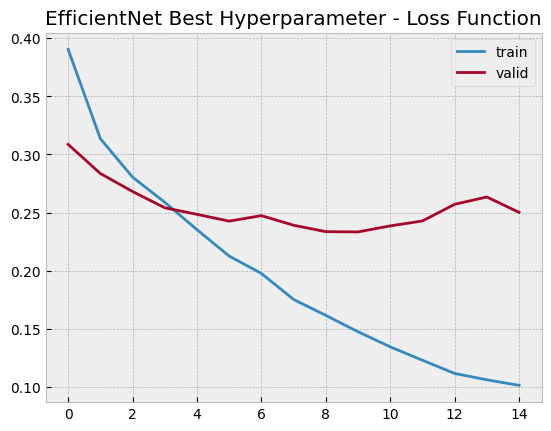

In [32]:
plt.style.use("bmh")

# Plot loss function value through epochs
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')

plt.legend(loc='upper right')
plt.title('EfficientNet Best Hyperparameter - Loss Function')
plt.show()

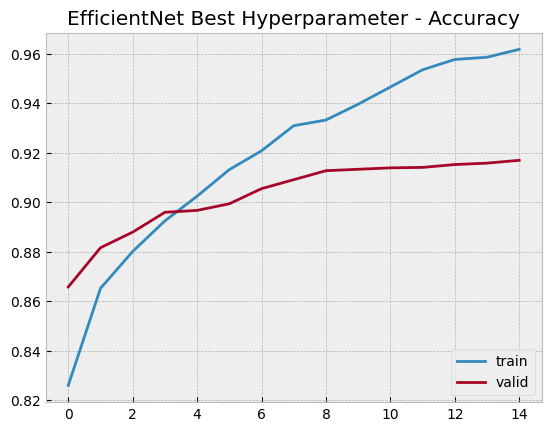

In [33]:
# Plot accuracy through epochs

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')

plt.legend(loc='lower right')
plt.title('EfficientNet Best Hyperparameter - Accuracy')
plt.show()

In [35]:
# test
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc)

164/164 - 16s - loss: 0.2502 - accuracy: 0.9169
0.9169213175773621
